In [1]:
import sys, os
import numpy as np
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../"))
from yolo import YOLO, detect_video

plt.rcParams["figure.figsize"] = [7, 7]

Using TensorFlow backend.


## Get YOLO model

In [2]:
params = {
    'model_path':   f'../{YOLO.get_defaults("model_path")}',
    'anchors_path': f'../{YOLO.get_defaults("anchors_path")}',
    'classes_path': f'../{YOLO.get_defaults("classes_path")}',
    'font': '../font/FiraMono-Medium.otf',
    'image':  True,
}

model = YOLO(**params)

../model_data/yolo.h5 model, anchors, and classes loaded.


## Get input image

width: 1023 - height: 576


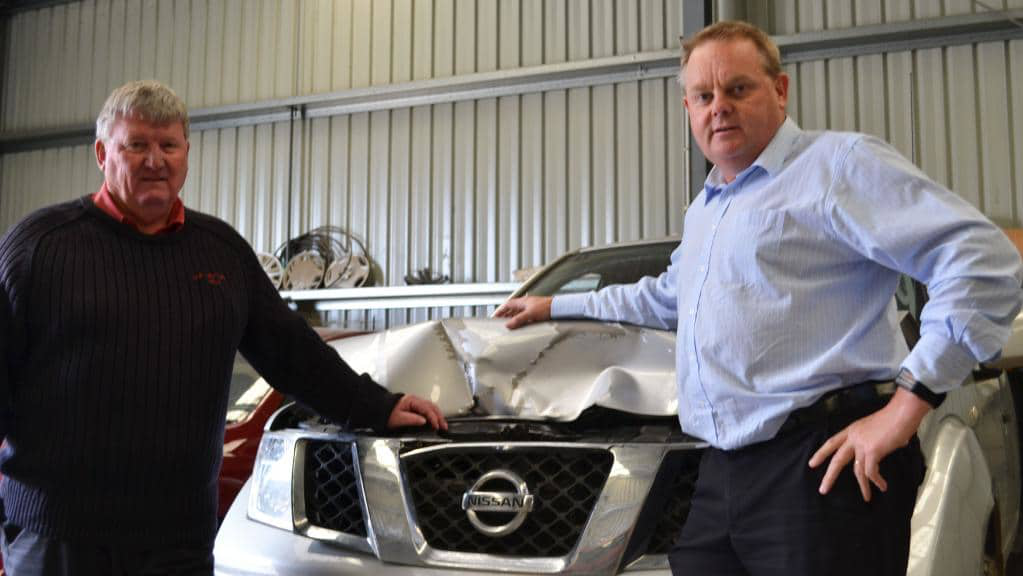

In [3]:
input_path = '../data/input/00000494.jpg'

img = Image.open(input_path)
print(f'width: {img.size[0]} - height: {img.size[1]}')
img

## Detect image

(416, 416, 3)
Found 2 boxes for img
person 1.00 (469, 27) (1021, 570)
person 1.00 (0, 92) (465, 576)
3.0026945610006806


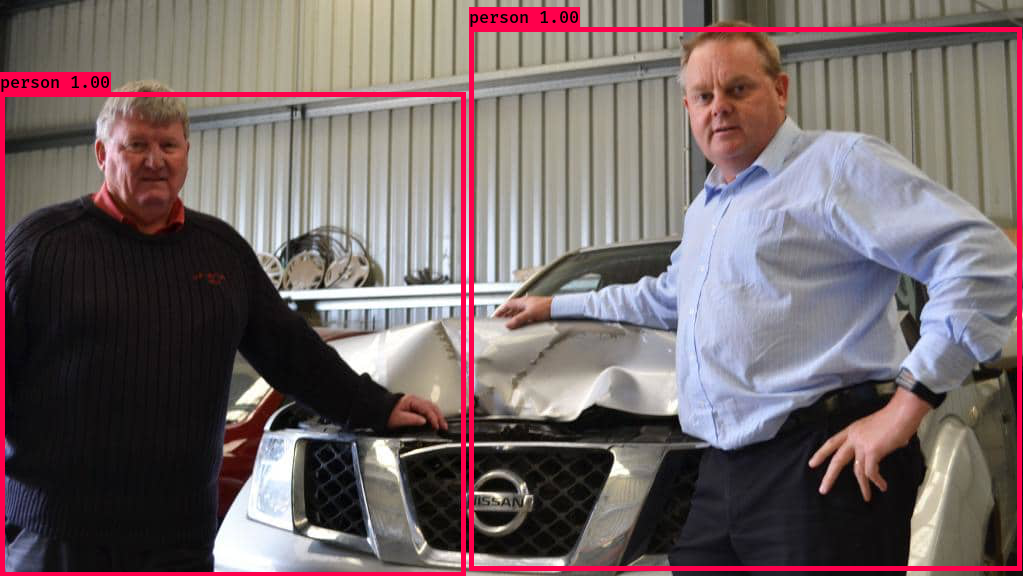

In [4]:
out_img, boxes, scores, classes, coords, labels = model.detect_image(img.copy())
out_img

In [5]:
print(f'Scores:  {scores}')
print(f'Classes: {classes}')
print(f'Coords:  {coords}')
print(f'Labels:  {labels}')

Scores:  [0.99971133 0.9992524 ]
Classes: [0 0]
Coords:  [[ 469   27 1021  570]
 [   0   92  465  576]]
Labels:  ['person' 'person']


## Draw Bounding Boxes on image using output coordinates

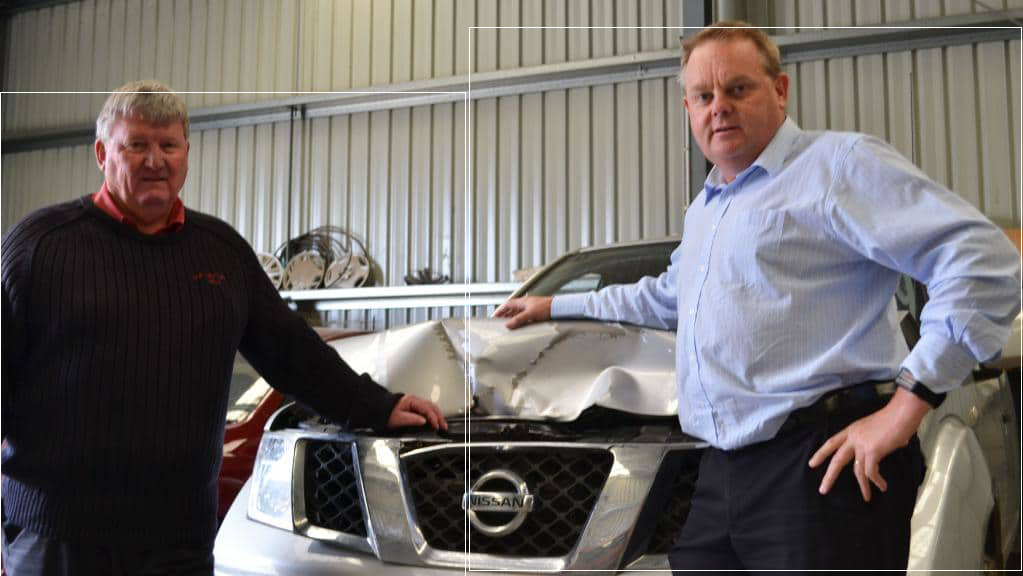

In [6]:
draw = ImageDraw.Draw(img)
for coord in coords:
    draw.rectangle(((coord[0], coord[1]), (coord[2], coord[3])))
    draw.rectangle(((coord[0], coord[1]), (coord[2], coord[3])))
img